# Emerging Technologies Project

**By Ethan Conneely (G00393941)**


**Table of contents**

- Emerging Technologies Project
  - Introduction
    - Quantum Computing
    - Deutsch's algorithm
  - Library Imports
  - Function Input
  - Deutsch Algorithm circuit creation
  - Real Hardware
    - Jobs
  - References

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


## Introduction


### Quantum Computing


Quantum computing is a new way of performing computation.  
It differs from classical computation by utilizing qubits instead of normal bits  
to perform a new type of computation that classical computation would  
take much longer to compute.

The main advantage of quatum computing is that it can perform many computations  
at the same time, whereas classical computing can only perform one computation.  
The way this is achieved is by using the properties of quantum mechanics,  
The ability to put a qubit in a superposition of states allows the qubit to  
effectively act as a 1 and a 0 at the same time. This allows for many computations  
to be performed at the same time.


### Deutsch's algorithm


Deutsch's algorithm is a quantum algorithm that determines whether a given Boolean function is constant or balanced.

- A constant function is one that always returns the same value, regardless of the input.
- A balanced function is one that returns 0 for half of the inputs and 1 for the other half.

It can be represented using the following equation:

Deutsch's algorithm takes in 1 bit that are 0 or 1 and outputs a 1 bit also 0 or 1

$\Sigma = \{0,1\}$

$f : \Sigma\rightarrow \Sigma$

The algorithm outputs 0 for constant and 1 for balanced

It is effective doing the xor operation from classical computing.


## Library Imports


For quantum simulation in python Qiskit can be used.  
It is a library that we can use to run quantum simulations and make circuits.

Matplotlib will be used for visualising the circuit diagrams generated from qiskit.


In [52]:
from qiskit import QuantumCircuit, Aer
from qiskit.result import Result
import matplotlib.pyplot as plt


## Function Input


Below are all the possible input function in a table [[1]](#1)

| function $f(x)$ | $x=0$ | $x=1$ | $f(0) ⨁ f(1)$ |
| --------------- | ----- | ----- | ------------- |
| $f_0$           | 0     | 0     | 0             |
| $f_1$           | 0     | 1     | 1             |
| $f_2$           | 1     | 0     | 1             |
| $f_3$           | 1     | 1     | 0             |


This is the first circuit it does nothing and is of type constant.


Below is the 4 complete circuits for each function [[1]](#1)


c:\Users\Econn\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


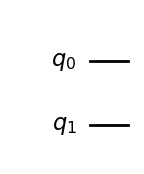

In [53]:
constantCircuitA = QuantumCircuit(2)
constantCircuitA.draw(output='mpl')


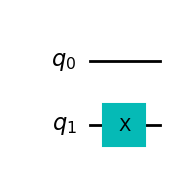

In [54]:
constantCircuitB = QuantumCircuit(2)
constantCircuitB.x(1)
constantCircuitB.draw(output='mpl')


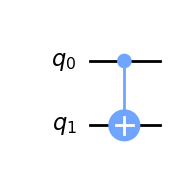

In [55]:
balancedCircuitA = QuantumCircuit(2)
balancedCircuitA.cx(0, 1)
balancedCircuitA.draw(output='mpl')


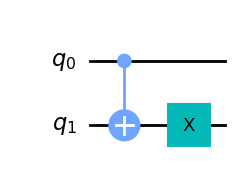

In [56]:
balancedCircuitB = QuantumCircuit(2)
balancedCircuitB.cx(0, 1)
balancedCircuitB.x(1)
balancedCircuitB.draw(output='mpl')


## Deutsch Algorithm circuit creation


The algorithm is made up of 2 qubits and 1 classical bit.  
It creates the circuit and combines in the function to be tested.

The basic layout for the diagram was gotten from this diagram i added in the function composition. [[2]](#2)


In [57]:
def deutsch_algorithm_circuit(function: QuantumCircuit) -> QuantumCircuit:
    """
    Implements Deutsch's algorithm to determine whether a function f is constant or balanced.

    Arguments:
        function (QuantumCircuit): The function to evaluate.

    Returns:
        QuantumCircuit: The Deutsch algorithm circuit.
    """

    qc = QuantumCircuit(2, 1)

    # flipt the second qubit
    qc.x(1)

    # Apply Hadamard gates to both qubits
    qc.h(range(2))

    qc.barrier()  # for visual separation

    # Combine the functions into a single circuit
    qc.compose(function, range(2), inplace=True)

    qc.barrier()  # for visual separation

    # Apply Hadamard gates to qubit 0
    qc.h(0)

    qc.barrier()  # for visual separation

    # # Measure the first qubit
    qc.measure(0, 0)

    return qc


Run the simulation with Aer's qasm simulator the results  
are returned from measuring the qubits.

The possible results:

- 0 - constant
- 1 - balanced

With real quantum computers the results are not always accurate
due to noise and other factors.
The values can be


In [58]:
def simulate_deutsch_algorithm(deutsch_circuit: QuantumCircuit) -> Result:
    """
    Aer simulation of Deutsch's algorithm.

    Arguments:
        deutsch_circuit (QuantumCircuit): The Deutsch algorithm circuit.

    Returns:
        Result: The simulation result.
    """

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')

    return simulator.run(deutsch_circuit).result()


In [59]:
input_functions = [
    constantCircuitA, constantCircuitB, balancedCircuitA, balancedCircuitB
]


In [74]:
circuits = [deutsch_algorithm_circuit(f) for f in input_functions]


In [75]:
def count_to_type(count):
    # Determine whether the function is constant or balanced
    # if there are more 0s than 1s, the function is constant
    if int(count.get("0", 0)) > int(count.get("1", 0)):
        return "constant"  # Function is constant
    else:
        return "balanced"  # Function is balanced


Below is all the diagrams for the 4 circuits and the results of the simulation.


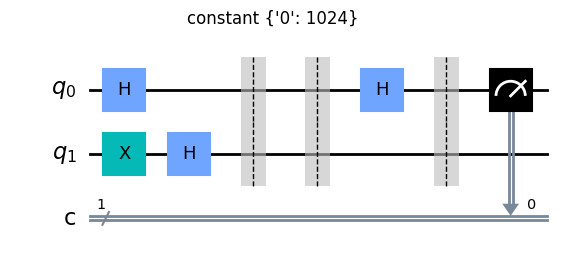

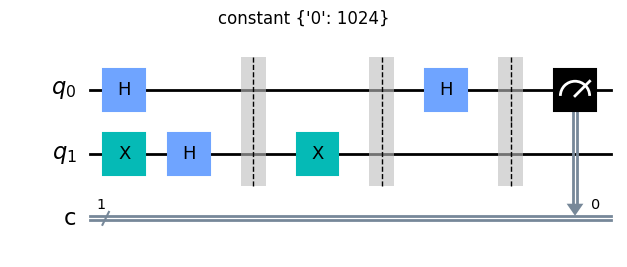

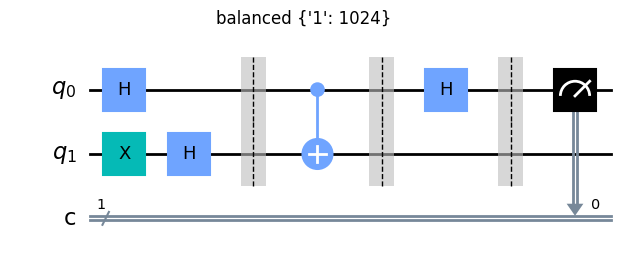

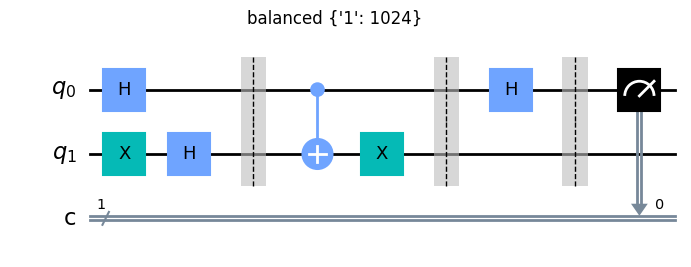

In [83]:
for circuit in circuits:
    # Create a figure
    fig = plt.figure(circuit.draw(output='mpl'))
    # Determine whether the circuit is constant or balanced
    state = simulate_deutsch_algorithm(circuit)
    count = state.get_counts()

    # Add the title to the figure
    fig.suptitle(count_to_type(count) + " " + str(count))

    # Show the figure
    plt.show()


As you can see above the results are perfect which is not realistic to quantum computers.  
Next up is the results from a real quantum computer.  
Where the results are not perfect.


## Real Hardware


Run the simulation on real quantum computers and compare the results. [[3]](#3)

The results are not always accurate due to noise and other factors.  
This gives a real world usecase of how a quantumn computer would perform.

I went with ibm_lagos which has 7 qubits (which is more than enough for the algorithm) and would be the cheapest to run in terms of time usage. [[4]](#4)

![Quantum Hardware](imgs/QuantumHardware.png)


Below the connection to the quantum computer is made and the circuit is sent to the quantum computer to be run.


In [62]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Create a runtime program from my saved credentials
service = QiskitRuntimeService()
backend = service.backend("ibm_lagos")

# Run balanced program A on the real quantum system
job = Sampler(backend).run(circuits=circuits)
print(f"job id: {job.job_id()}")
quantumResult = job.result()


job id: cna3n8dyzmv0008w8zxg


Render out the results from the quantum computer.


{0: 1.002514367816092, 1: -0.002514367816092}


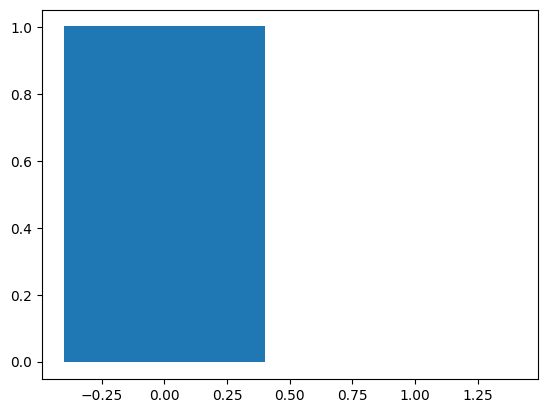

{0: 0.017104039891819, 1: 0.982895960108181}


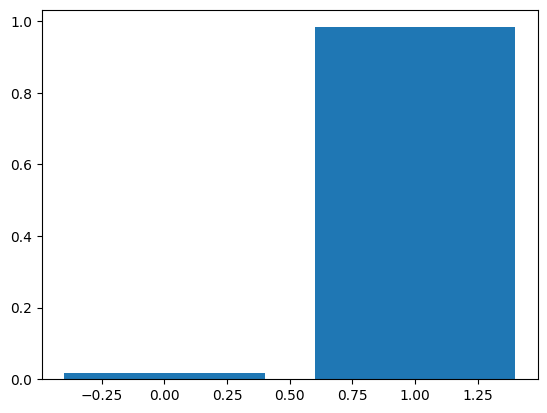

In [86]:
for data in quantumResult.quasi_dists:
    bar = plt.bar([0, 1], list(data.values()), align='center')
    print(data)
    plt.show()


### Jobs

Here are the jobs that were run on the quantum computer.  
I first ran them on the simulator to get the results and make sure it works before running on real quantum computers.

![Alt text](imgs/QuantumJobs.png)


## References

- <a id="1">[1]:</a> Input table reference https://anonymousket.medium.com/quantum-algo-deutsch-algorithm-ccc119c69c08#b0aa
- <a id="2">[2]:</a> Circuit diagram reference https://i.ytimg.com/vi/7MdEHsRZxvo/maxresdefault.jpg
- <a id="3">[3]:</a> How to setup account and token for real hardware https://docs.quantum-computing.ibm.com/run
- <a id="4">[4]:</a> How to run on real hardware https://qiskit.org/ecosystem/ibm-runtime/how_to/backends.html
